In [1]:
import os
import pandas as pd

import jel.plot as jelplot

# Load dataset 

In [2]:
dfs = []
for i in os.listdir("data"):
    for j in os.listdir(f"data/{i}"):
        data = pd.read_csv(f"data/{i}/{j}", sep=";")
        dfs.append(data)

df = pd.concat(dfs, sort=False)
df = df[df.year < 2024]
df.head()

,journal,year,url,jel
0,Environmental & Resource Economics,2019,https://link.springer.com/article/10.1007/s106...,D73
1,Environmental & Resource Economics,2019,https://link.springer.com/article/10.1007/s106...,Q5
2,Environmental & Resource Economics,2019,https://link.springer.com/article/10.1007/s106...,Q54
3,Environmental & Resource Economics,2019,https://link.springer.com/article/10.1007/s106...,Q56
4,Environmental & Resource Economics,2019,https://link.springer.com/article/10.1007/s106...,F18


In [3]:
df["primary"] = df.apply(lambda x: x.jel[0], axis=1)
df["secondary"] = df.apply(lambda x: x.jel[:2], axis=1)
df["tertiary"] = df.apply(lambda x: x.jel[:3], axis=1)
df.head()

,journal,year,url,jel,primary,secondary,tertiary
0,Environmental & Resource Economics,2019,https://link.springer.com/article/10.1007/s106...,D73,D,D7,D73
1,Environmental & Resource Economics,2019,https://link.springer.com/article/10.1007/s106...,Q5,Q,Q5,Q5
2,Environmental & Resource Economics,2019,https://link.springer.com/article/10.1007/s106...,Q54,Q,Q5,Q54
3,Environmental & Resource Economics,2019,https://link.springer.com/article/10.1007/s106...,Q56,Q,Q5,Q56
4,Environmental & Resource Economics,2019,https://link.springer.com/article/10.1007/s106...,F18,F,F1,F18


In [4]:
# Check number of papers
len(set(df.url))

14783

In [5]:
# Check number of papers by journal
df.groupby("journal")["url"].nunique().reset_index().rename(columns={"url": "count"})

,journal,count
0,American Economic Journal: Applied Economics,634
1,American Economic Journal: Economic Policy,682
2,American Economic Journal: Macroeconomics,542
3,American Economic Review,3286
4,Economic Theory,714
5,Empirical Economics,2236
6,Environmental & Resource Economics,298
7,Experimental Economics,553
8,Finance and Stochastics,158
9,International Journal of Game Theory,441


# Create indicators

## JEL Classification Code with the highest count

In [6]:
# Primary
## Highest count: D (Microeconomics)
df.groupby("primary").size().reset_index().rename(columns={0: "count"}).sort_values(by="count", ascending=False).head()

,primary,count
14,D,8314
13,C,5556
20,J,5471
15,E,4742
22,L,4331


In [7]:
primary_highest = df[df.primary == "D"].groupby("year").size().reset_index().rename(columns={0: "count"})
primary_highest.head()

,year,count
0,1991,16
1,1992,7
2,1993,9
3,1994,6
4,1995,11


In [8]:
# Secondary
## Highest count: D8 (Information, Knowledge, and Uncertainty)
df.groupby("secondary").size().reset_index().rename(columns={0: "count"}).sort_values(by="count", ascending=False).head()

,secondary,count
99,D8,2222
202,L2,2021
243,O1,2010
183,J1,1828
184,J2,1542


In [9]:
secondary_highest = df[df.secondary == "D8"].groupby("year").size().reset_index().rename(columns={0: "count"})
secondary_highest.head()

,year,count
0,1991,4
1,1992,2
2,1996,4
3,1998,1
4,1999,3


In [10]:
# Tertiary
## Highest count: L26 (Entrepreneurship)
df.groupby("tertiary").size().reset_index().rename(columns={0: "count"}).sort_values(by="count", ascending=False).head()

,tertiary,count
820,L26,1311
359,D72,789
415,E32,765
718,J24,714
370,D83,646


In [11]:
tertiary_highest = df[df.tertiary == "L26"].groupby("year").size().reset_index().rename(columns={0: "count"})
tertiary_highest.head()

,year,count
0,2006,1
1,2008,1
2,2009,3
3,2010,38
4,2011,59


In [12]:
count_by_year = df.groupby(["year", "jel"]).size().reset_index().rename(columns= {0: "count"})
count_by_year = count_by_year.sort_values(by=["jel", "year"], ascending=True)
count_by_year.head()

,year,jel,count
10876,2023,\nC14\n,1
7366,2018,\nD82\n,1
7367,2018,\nD85\n,1
10877,2023,\nE24,2
10878,2023,\nE40\n,1


## Annual count for a certain JEL classification code

In [13]:
# Education and Research Institutions
i2 = df[df.secondary == "I2"].groupby("year").size().reset_index().rename(columns={0: "count"})
i2.head()

,year,count
0,1991,2
1,1992,1
2,1993,3
3,1996,4
4,1998,3


## JEL Classification Code with the highest average annual growth

In [14]:
# here

# Visualize

## JEL Classification Code with the highest count

### Primary

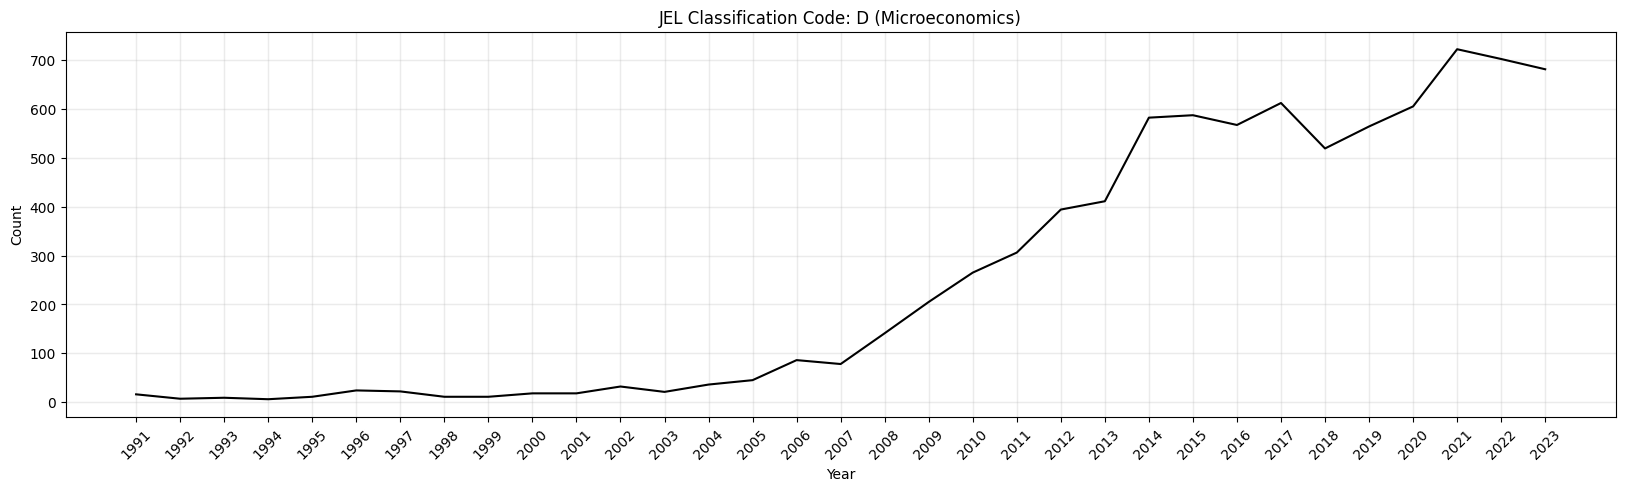

In [15]:
# Business Fluctuations; Cycles
jelplot.highest_jel(df=primary_highest, jel="D (Microeconomics)")

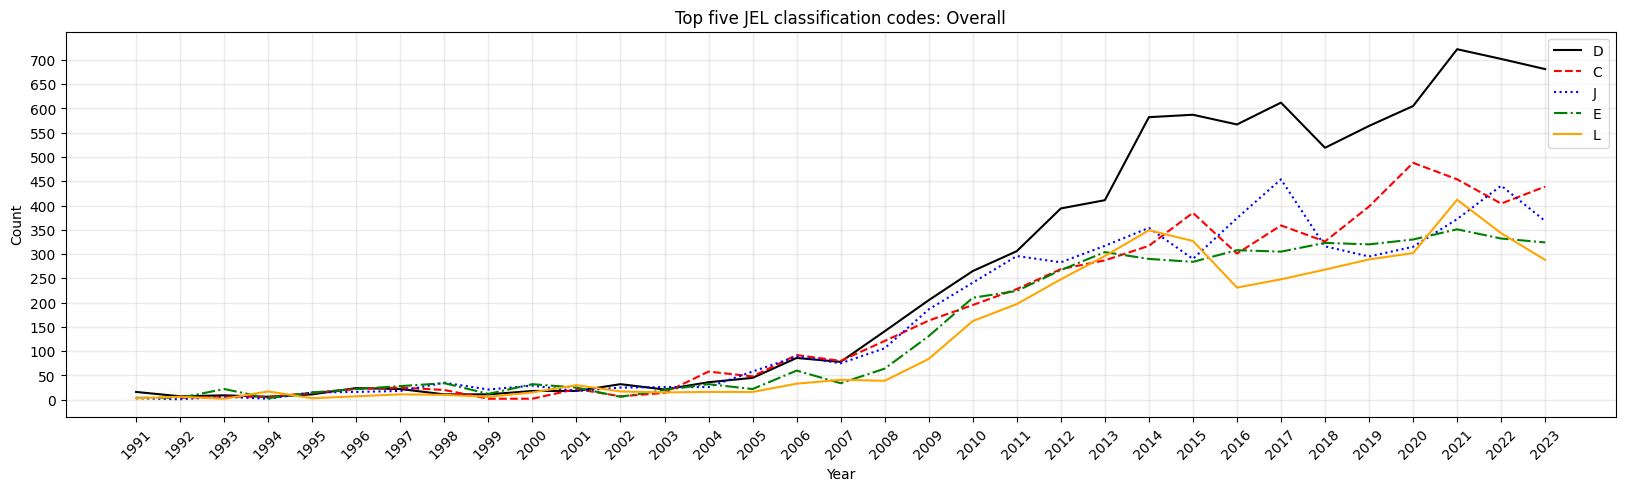

In [16]:
jelplot.top_five_jel(df=df, column="primary", journal_name="Overall", y_interval=50)

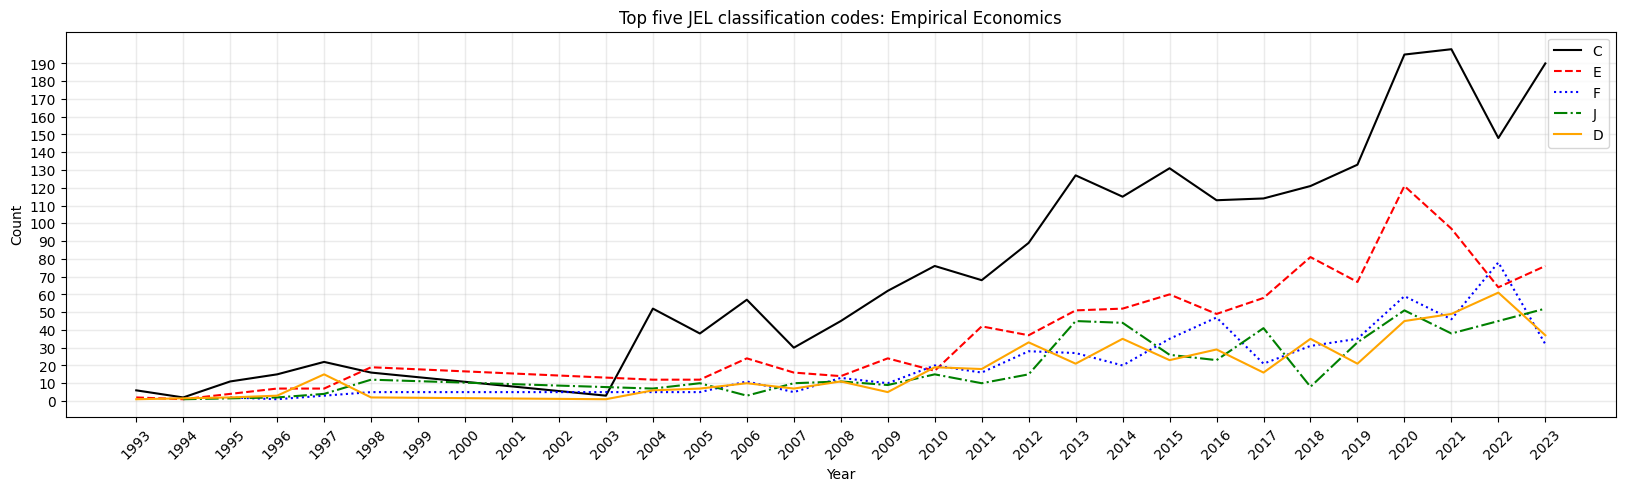

In [17]:
empirical_economics = df[df.journal == "Empirical Economics"]
jelplot.top_five_jel(df=empirical_economics, column="primary", journal_name="Empirical Economics")

### Secondary

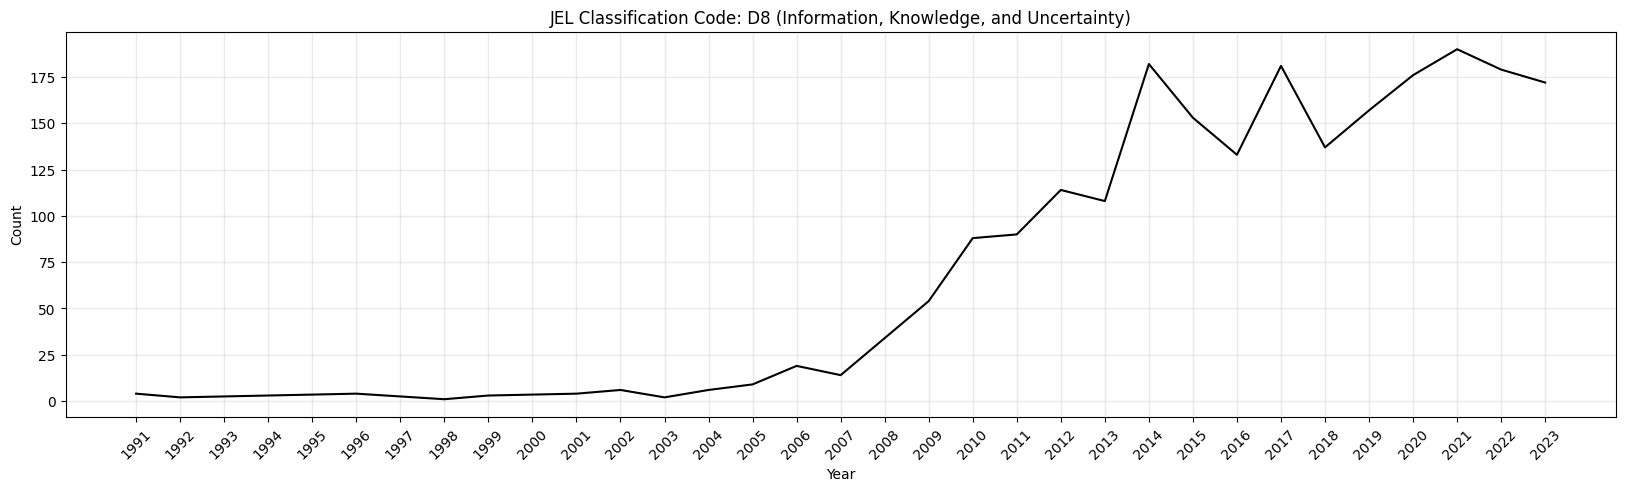

In [18]:
# Business Fluctuations; Cycles
jelplot.highest_jel(df=secondary_highest, jel="D8 (Information, Knowledge, and Uncertainty)")

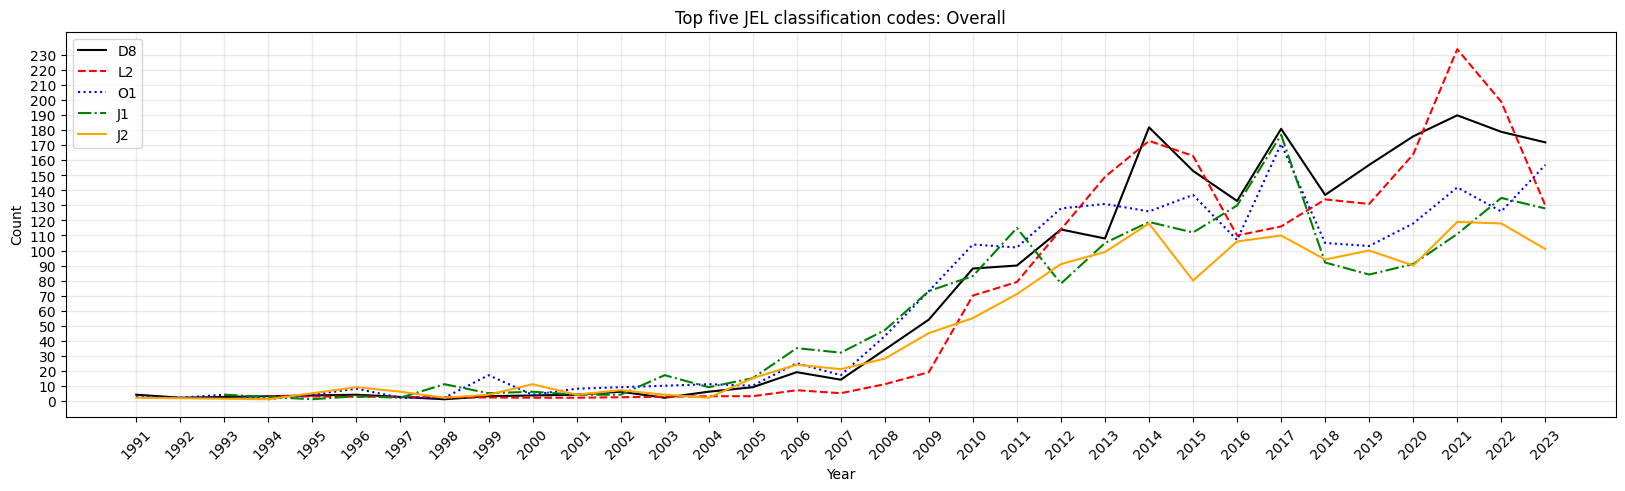

In [19]:
jelplot.top_five_jel(df=df, column="secondary", journal_name="Overall")

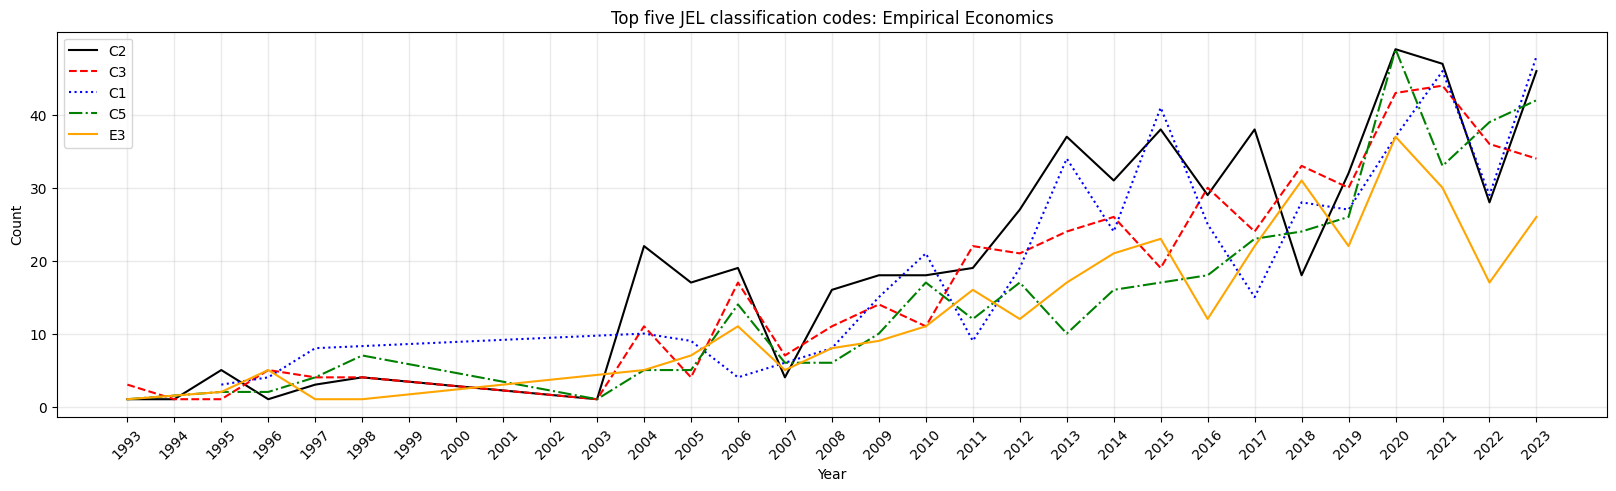

In [20]:
jelplot.top_five_jel(df=empirical_economics, column="secondary", journal_name="Empirical Economics")

### Tertiary

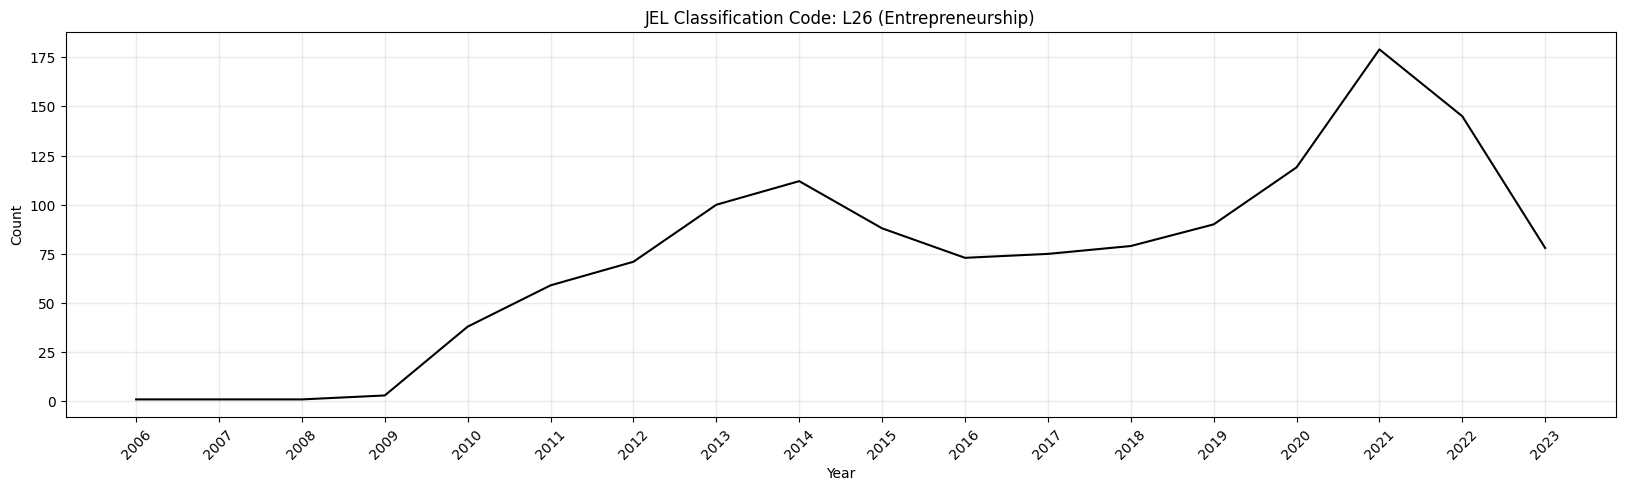

In [21]:
# Business Fluctuations; Cycles
jelplot.highest_jel(df=tertiary_highest, jel="L26 (Entrepreneurship)")

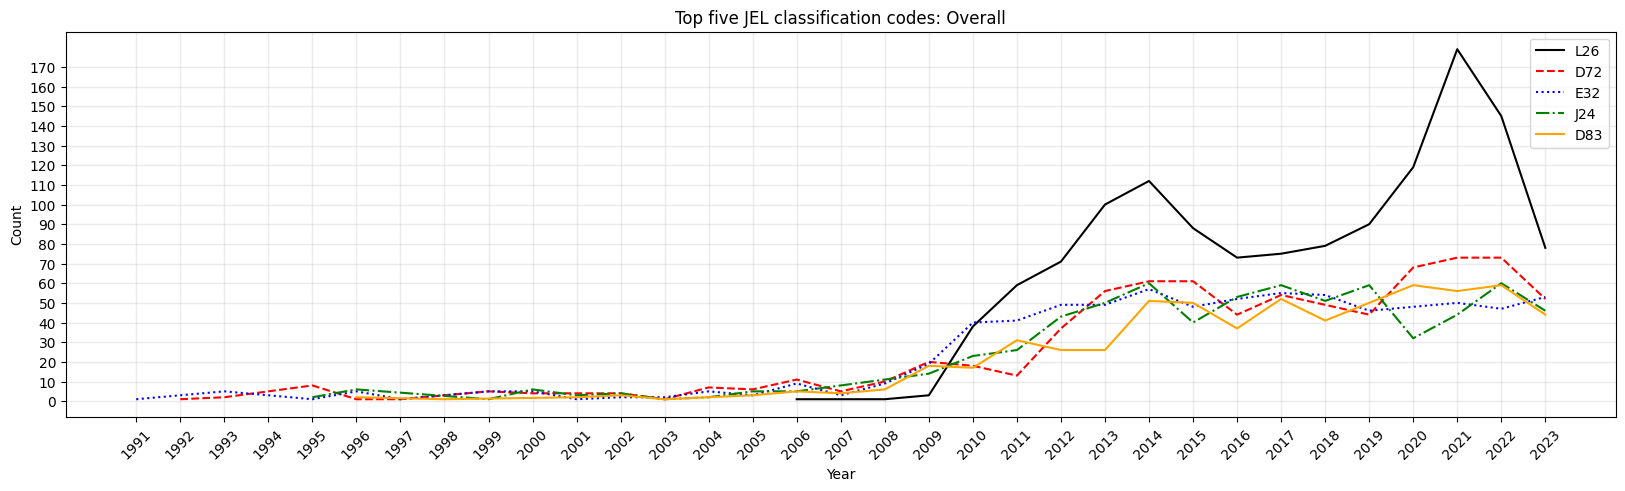

In [22]:
jelplot.top_five_jel(df=df, column="tertiary", journal_name="Overall")

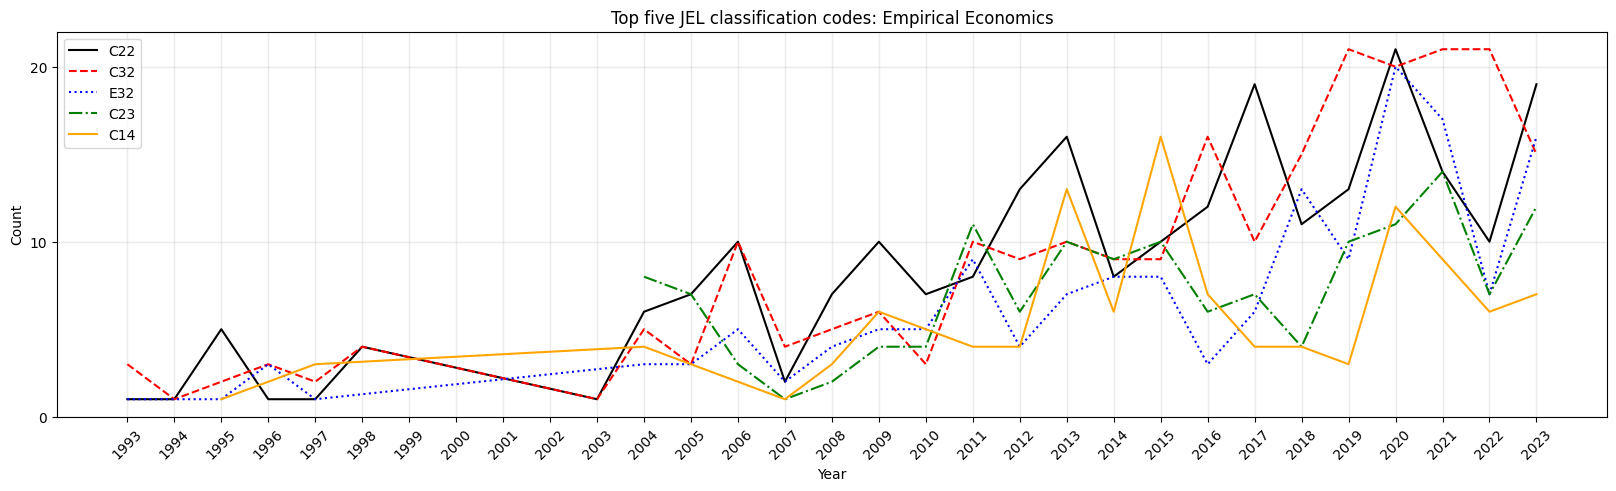

In [23]:
jelplot.top_five_jel(df=empirical_economics, column="tertiary", journal_name="Empirical Economics")

## Annual count for a certain JEL classification code

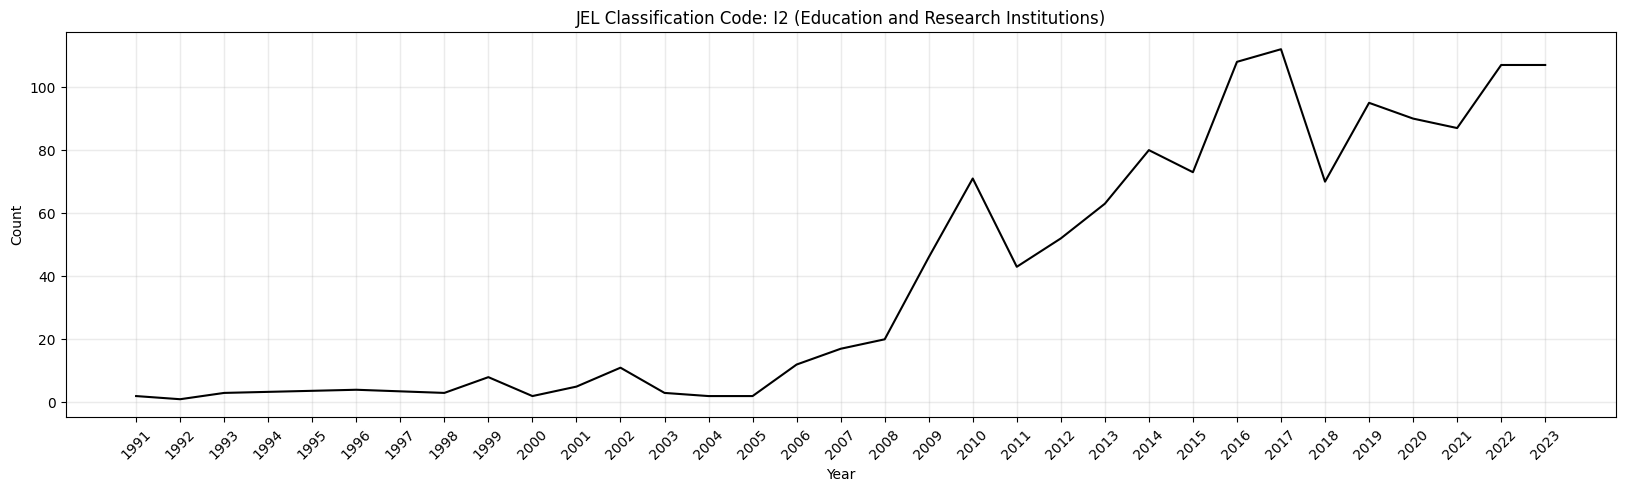

In [24]:
jelplot.highest_jel(df=i2, jel="I2 (Education and Research Institutions)")

## JEL Classification Code with the highest count within the last N years

In [25]:
df[df.year.between(2019, 2023)].groupby("primary").size().reset_index().rename(columns={0: "count"}).sort_values(by="count", ascending=False).head()

,primary,count
13,D,3274
12,C,2183
19,J,1791
14,E,1657
21,L,1634


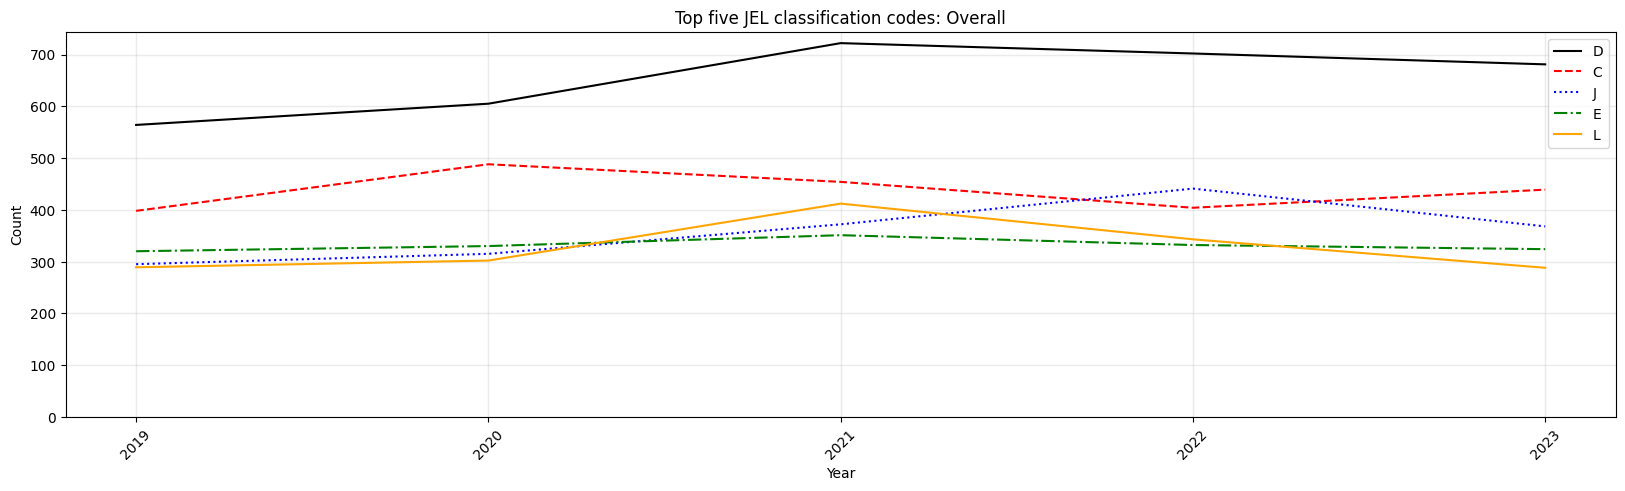

In [26]:
jelplot.top_five_jel(df=df[df.year.between(2019, 2023)], column="primary", journal_name="Overall", y_interval=100)

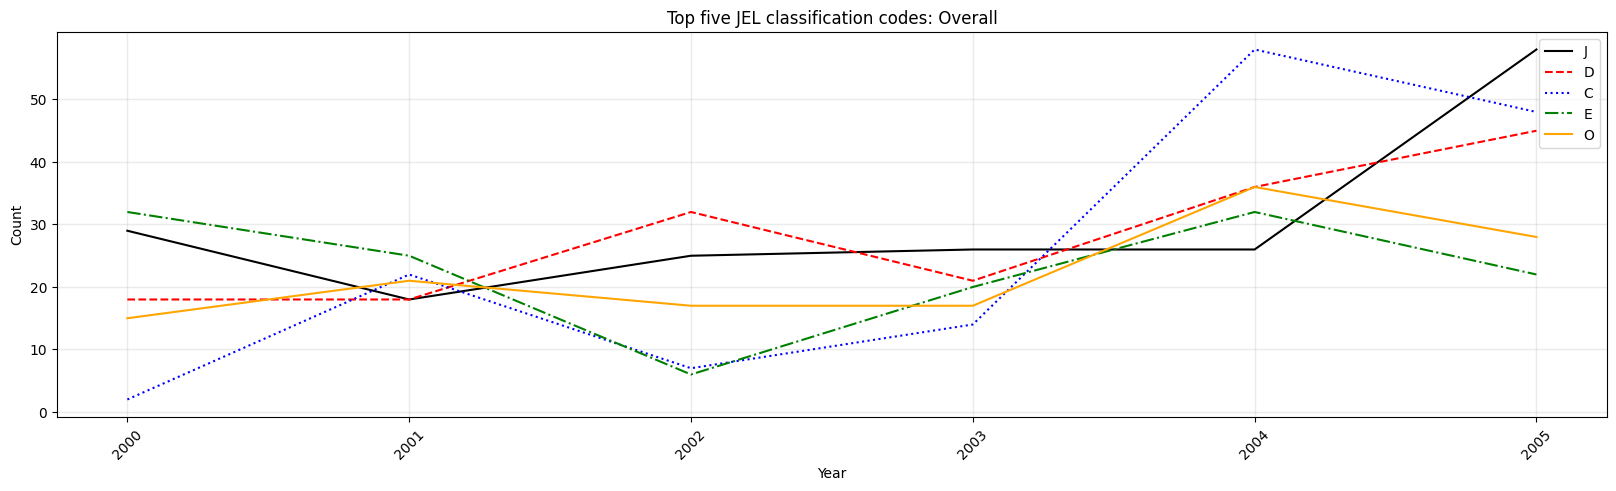

In [27]:
jelplot.top_five_jel(df=df[df.year.between(2000, 2005)], column="primary", journal_name="Overall")